### Investigate Factors that determine if a patient will show_up for appointments and schedule

<a id='intro'></a>
### Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 


### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Data Exploration and Analysis

Loading the medical dataset

In [47]:
show_df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Cleaning Dataset

Dropping features that are not necessary for analysis

In [48]:
def drop_colums(show_df):
    show_df = show_df.drop(columns=["PatientId", "AppointmentID", "Neighbourhood"], axis=1)
    return show_df

In [49]:
drop_colums(show_df)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,0,0,0,0,0,1,No


encoding Gender and N0-show columns using mapping

In [50]:
sex = {"F":0, "M":1}

show_df["Gender"] = show_df["Gender"].map(sex).drop(columns=["Gender"], axis=1)

attend = {"No": 0, "Yes": 1}
show_df["No-show"] = show_df["No-show"].map(attend).drop(columns=["No-show"], axis=1)
show_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,0,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,0,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,0,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,0


Converting columns to Date time 

In [51]:
import datetime
show_df["Sch_date"] = pd.to_datetime(show_df.ScheduledDay,format="%Y-%m-%d")
show_df["App_date"] = pd.to_datetime(show_df.AppointmentDay,format="%Y-%m-%d")
show_df.drop(columns=["ScheduledDay", "AppointmentDay"], axis=1)


,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Sch_date,App_date
0,2.987250e+13,5642903,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00
1,5.589978e+14,5642503,1,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00
2,4.262962e+12,5642549,0,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00
3,8.679512e+11,5642828,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00
4,8.841186e+12,5642494,0,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,56,MARIA ORTIZ,0,0,0,0,0,1,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00
110523,3.596266e+12,5650093,0,51,MARIA ORTIZ,0,0,0,0,0,1,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00
110524,1.557663e+13,5630692,0,21,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00
110525,9.213493e+13,5630323,0,38,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00


Checking if there are missing values from our dataset

In [52]:
show_df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
Sch_date          0
App_date          0
dtype: int64

dealing with negative values in Age column 

In [53]:
show_df[show_df.Age < 0] = 1
show_df.Age.value_counts()

0      3539
1      2274
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

Getting a holistic information about the dataset

In [54]:
show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  int64  
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  int64  
 14  Sch_date        110527 non-null  object 
 15  App_date        110527 non-null  object 
dtypes: float64(1), int64(10), object(5)
memory usage: 13.5+ 

<a id='eda'></a>
## Exploratory Data Analysis


Factors that determine schedule appointment

Statistical summary of the dataset

In [55]:
show_df.describe()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474921e+14,5.675253e+06,0.350032,37.088892,0.098275,0.197255,0.071874,0.030409,0.022257,0.321035,0.201942
std,2.560935e+14,7.331035e+04,0.476982,23.110176,0.297687,0.397928,0.258280,0.171710,0.161569,0.466876,0.401451
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680571e+06,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725522e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


From the above statistical summary it shows that the average age in our dataset is 37years and the eldest to be 115years old, it also shows that there are some patient that are far below 0years.

total numbers of male and female that book for appointment

Text(0, 0.5, 'show_dff_for check')

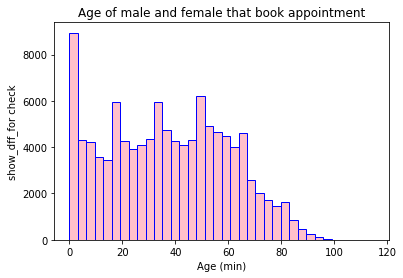

In [56]:
plt.Figure(figsize=(15,7))
plt.hist(show_df['Age'], color = 'pink', edgecolor = 'blue',
         bins = int(180/5))
plt.title('Age of male and female that book appointment')
plt.xlabel('Age (min)')
plt.ylabel('show_dff_for check')

From the above graph it shows that we have more people between the age of 20 to 60

Numbers of male and female that show up for medical appointment

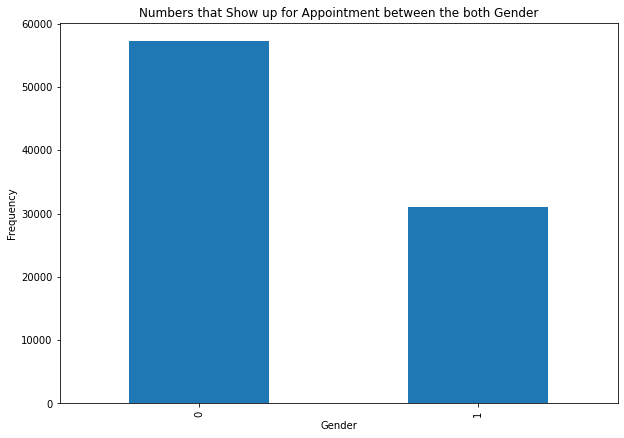

In [57]:
df = show_df[show_df["No-show"].isin([0])]
df["Gender"].value_counts().plot(kind="bar", title="Numbers that Show up for Appointment between the both Gender", xlabel = "Gender", ylabel = "Frequency", figsize=(10, 7));

The above graph shows the number of female to male that attend scheduled appointed, which goes to say female do meet up more often to their schedule medical appointment.

In [58]:
df["Gender"].value_counts()

0    57245
1    30962
Name: Gender, dtype: int64

Scholarship and showed up for appointment

/tmp/ipykernel_175/4157417639.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[show_df["No-show"].isin([0])]


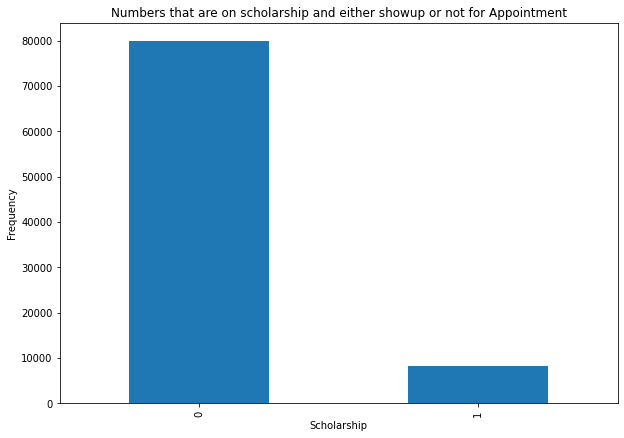

In [59]:
df = df[show_df["No-show"].isin([0])]
df.Scholarship.value_counts().plot(kind="bar", title="Numbers that are on scholarship and either showup or not for Appointment",  xlabel = "Scholarship", ylabel = "Frequency", figsize=(10, 7));

The above bar chart shows the numbers of people that have medical scholarship and at same time showup for medical appointment which goes to say the more free medical service the more people will go for their appointment as at when schedule 

numbers of people below average age that got scholarship

In [60]:
def plot_graph(show_df):

    avg_age = show_df.Age <= show_df.Age.median()
    abv_avg_age = show_df.Age >= show_df.Age.median()

    show_df.Scholarship[avg_age].hist(alpha=0.5, bins=20, label='Below Avg Age')
    show_df.Scholarship[abv_avg_age].hist(alpha=0.5, bins=20, label='Above Avg Age')
    plt.title("Total Medical Scholarship")
    plt.xlabel("Frequency of medical Scholarship")
    plt.ylabel("medical Scholarship")
    plt.legend()
    
    return plt.show()

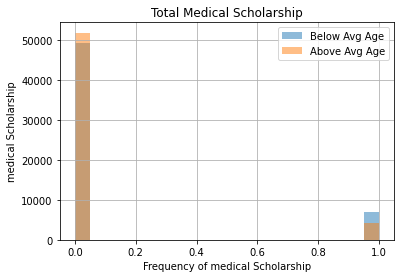

In [61]:
plot_graph(show_df)

numbers of younger patient that got an sms alert 

In [62]:
    avg_age = show_df.Age <= show_df.Age.median()
    abv_avg_age = show_df.Age >= show_df.Age.median()

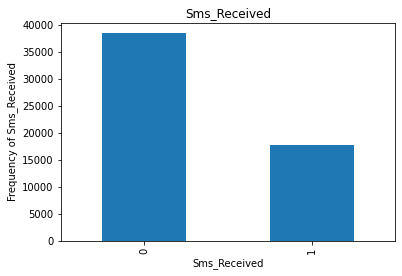

In [63]:
show_df.SMS_received[avg_age].value_counts().plot(kind="bar", title="Sms_Received",  xlabel = "Sms_Received", ylabel = "Frequency of Sms_Received");

Younger people that do meet up with medical appointment

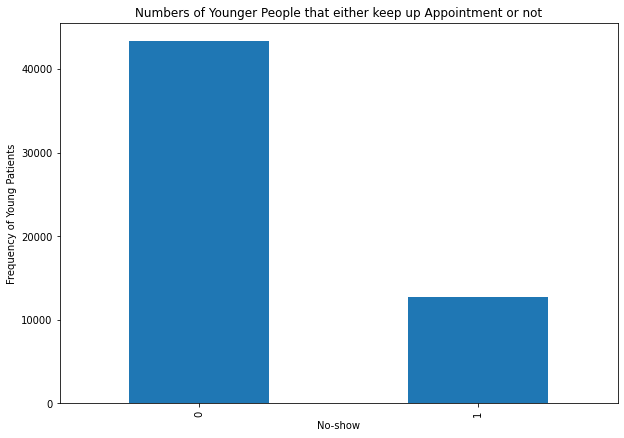

In [64]:
show_df["No-show"][avg_age].value_counts().plot(kind="bar", title="Numbers of Younger People that either keep up Appointment or not",  xlabel = "No-show", ylabel = "Frequency of Young Patients",figsize=(10,7));

Elderly people that do meetup with medical appointment

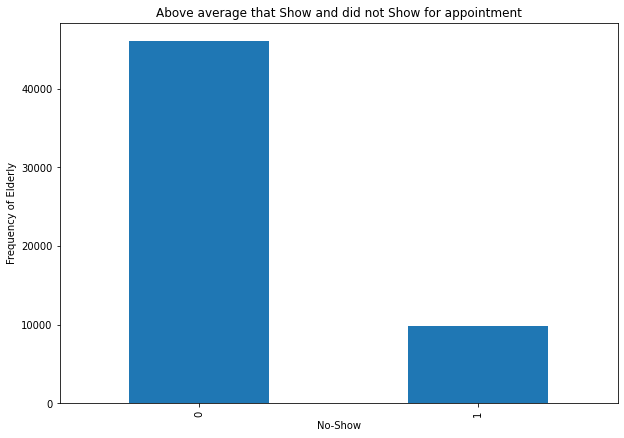

In [65]:
show_df["No-show"][abv_avg_age].value_counts().plot(kind="bar", title="Above average that Show and did not Show for appointment", xlabel = "No-Show", ylabel = "Frequency of Elderly", figsize=(10, 7));

Elderly that recieve their appointment via sms

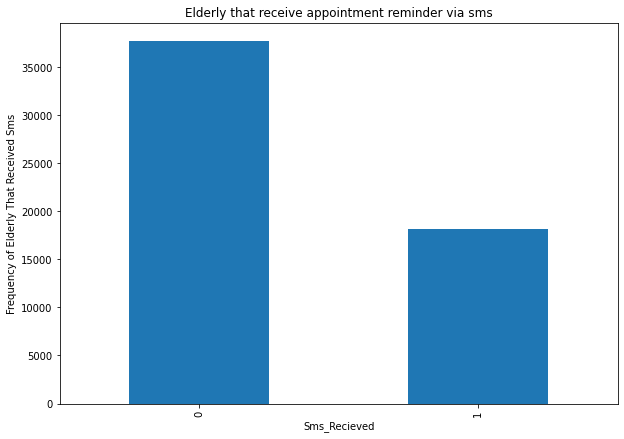

In [66]:
show_df.SMS_received[abv_avg_age].value_counts().plot(kind="bar", title="Elderly that receive appointment reminder via sms", xlabel = "Sms_Recieved", ylabel = "Frequency of Elderly That Received Sms", figsize=(10,7));

Below average Age that receive reminder via sms

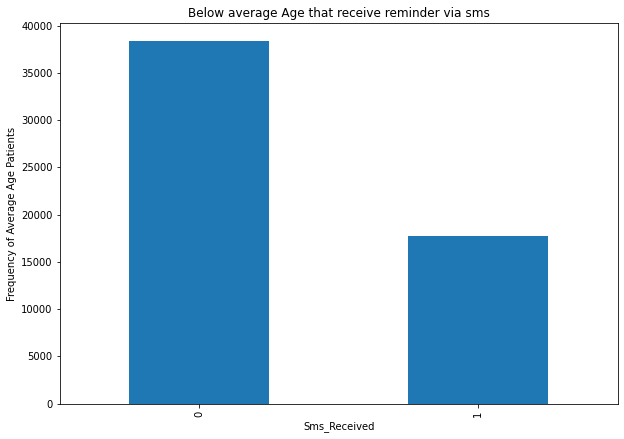

In [67]:
show_df.SMS_received[avg_age].value_counts().plot(kind="bar", title="Below average Age that receive reminder via sms",  xlabel = "Sms_Received", ylabel = "Frequency of Average Age Patients", figsize=(10,7));

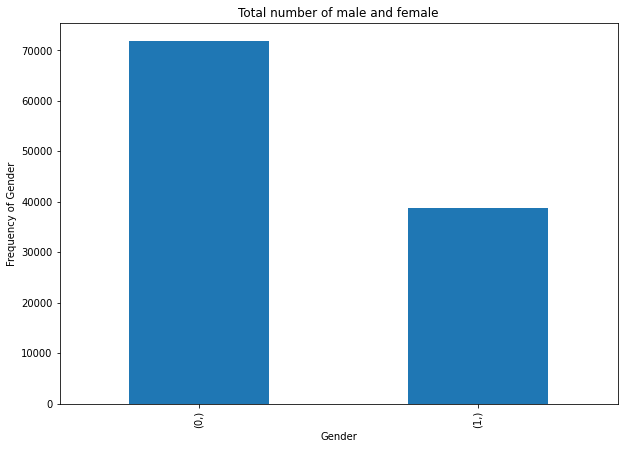

In [68]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
show_df[["Gender"]].value_counts().plot(kind="bar", title="Total number of male and female", xlabel = "Gender", ylabel = "Frequency of Gender", figsize=(10,7));

### Research Question 2  (Replace this header name!)

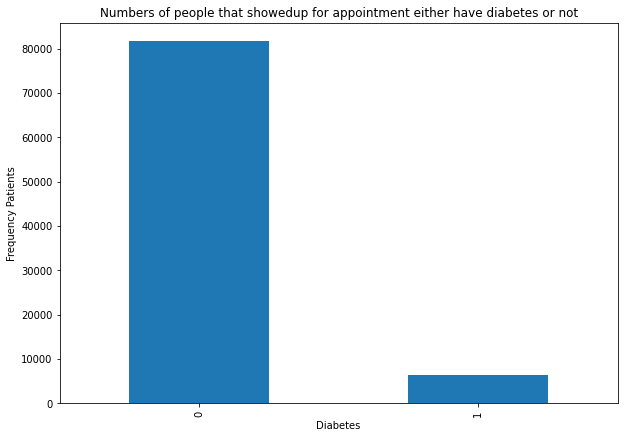

In [69]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.Diabetes.value_counts().plot(kind="bar", title="Numbers of people that showedup for appointment either have diabetes or not", xlabel = "Diabetes", ylabel = "Frequency Patients", figsize=(10,7));

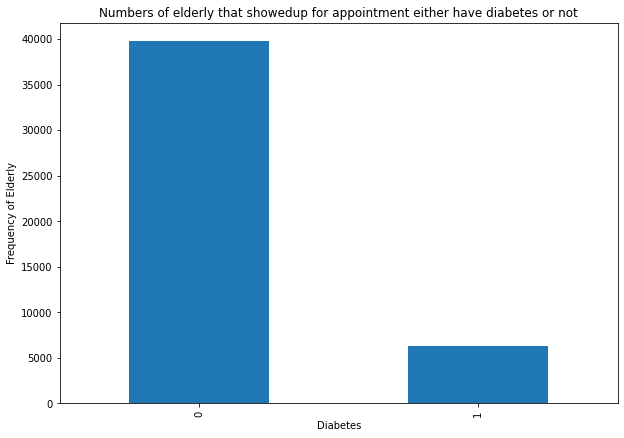

In [70]:
df.Diabetes[abv_avg_age].value_counts().plot(kind="bar", title="Numbers of elderly that showedup for appointment either have diabetes or not",  xlabel = "Diabetes", ylabel = "Frequency of Elderly", figsize=(10,7));

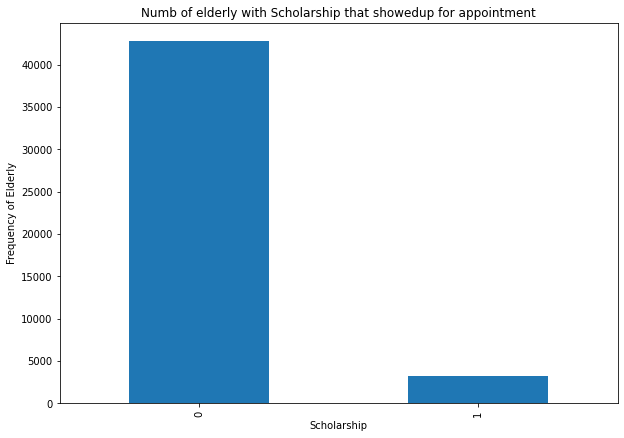

In [71]:
df.Scholarship[abv_avg_age].value_counts().plot(kind="bar", title="Numb of elderly with Scholarship that showedup for appointment", xlabel = "Scholarship", ylabel = "Frequency of Elderly", figsize=(10,7));

<a id='conclusions'></a>
## Conclusions

> From the analysis above the factors that are very important for us to determine if a patient will show up for their scheduled appointment includes:-
1. Age: given that the numbers of aged and younger patiend tend to meetup with the schedule appointment.
2. Scholarship: It is very clear that people meetup with scheduled medical appointment when is free most especially the Aged one's .
3. Sms: From the analysis it shows people that where reminded via sms some days before the scheduled appointment seems to show upore than people that where no reminded most especially the aged.
4. Diabetes: The analysis also shows that elderly that aways meetup with scheduled appointment have less chances of being affected by diabetes.

Limitation
1. There was no enough dataset to really tell which day of the week patients most frequently attend there appointment schedule.

Handlng Negative Values in Age
Since There is no negative age there is always the need to treat such negative age value as missing value but in this case instead of filling with median is best you fill with zero because there is a high tendency it is a typographical error of using -1 instead of 1.



In [72]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

/bin/python: No module named nbconvert


1